In [2]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
import xgboost as xgb
from sklearn.model_selection import train_test_split

def train(pd):
    										
    y = pd["Class"].copy()
    x = pd.drop(['Class'],axis=1)

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,stratify=y)

    print(f'({len(x_train)+len(y_train)},{(len(x_test)+len(y_test))})')

    return x_train, y_train,x_test,y_test



In [4]:
import matplotlib.pyplot as plt
def mapa_calor(corr_matrix):
  fig, ax = plt.subplots(figsize=(25, 15))
  text_colors = ("black" , "white" )
  im = ax.imshow(corr_matrix, cmap= "Oranges" ) # mapa de calor
  cbar = fig.colorbar(im, ax=ax, label= "Correlacion" ) # leyenda
  cbar.outline.set_visible(False)

  x = corr_matrix.columns
  y = corr_matrix.index
  # Mostrar las etiquetas. El color del texto cambia en función de su normalización
  for i in range(len(y)):
    for j in range(len(x)):
      value = corr_matrix.iloc[i, j]
      text_color = text_colors[int(im.norm(value) > 0.5)] # color etiqueta
      ax.text(j, i, f"{value:.2f}" , color=text_color, va= "center" , ha= "center" )



  # Formateo de los ejes
  ax.set_xticks(range(len(x)))
  ax.set_xticklabels(x, rotation=90)
  ax.set_yticks(range(len(y)))
  ax.set_yticklabels(y)
  ax.invert_yaxis()
  ax.spines["right"].set_visible(False) # ocultar borde derecho
  ax.spines["top"].set_visible(False) # ocultar borde superior
  fig.tight_layout()

def boxplot_general(pd,cadena):
    for tipo in pd.columns:
        if tipo !=cadena:
            data_to_plot = [pd[pd[cadena] == i][tipo].values for i in sorted(pd[cadena].unique())]
            plt.figure(figsize=(10, 6))
            plt.boxplot(data_to_plot, labels=sorted(pd[cadena].unique()),notch=True,patch_artist=True,
                        showmeans=True,whiskerprops=dict(color='deeppink',linewidth=1),
                        medianprops=dict(color='deeppink'),
                        flierprops=dict(color='deeppink', markerfacecolor='pink', linestyle= "none", markeredgecolor="none", markersize=9),
                        boxprops=dict(edgecolor='deeppink',  facecolor='pink', linewidth=2),
                        capprops=dict(color='deeppink', linewidth=2)
                        )
            plt.xlabel(cadena)
            plt.ylabel(f'{tipo}')
            plt.title(f'Boxplot Quality/ {tipo}')
            plt.show()

In [28]:
import pandas as pd
import pathlib

df = pd.read_csv("C:/Users/david.fernandezrebor/Desktop/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
df.shape

(284807, 31)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

array([[<Axes: title={'center': 'Time'}>, <Axes: title={'center': 'V1'}>,
        <Axes: title={'center': 'V2'}>, <Axes: title={'center': 'V3'}>,
        <Axes: title={'center': 'V4'}>, <Axes: title={'center': 'V5'}>],
       [<Axes: title={'center': 'V6'}>, <Axes: title={'center': 'V7'}>,
        <Axes: title={'center': 'V8'}>, <Axes: title={'center': 'V9'}>,
        <Axes: title={'center': 'V10'}>, <Axes: title={'center': 'V11'}>],
       [<Axes: title={'center': 'V12'}>, <Axes: title={'center': 'V13'}>,
        <Axes: title={'center': 'V14'}>, <Axes: title={'center': 'V15'}>,
        <Axes: title={'center': 'V16'}>, <Axes: title={'center': 'V17'}>],
       [<Axes: title={'center': 'V18'}>, <Axes: title={'center': 'V19'}>,
        <Axes: title={'center': 'V20'}>, <Axes: title={'center': 'V21'}>,
        <Axes: title={'center': 'V22'}>, <Axes: title={'center': 'V23'}>],
       [<Axes: title={'center': 'V24'}>, <Axes: title={'center': 'V25'}>,
        <Axes: title={'center': 'V26'}>, <

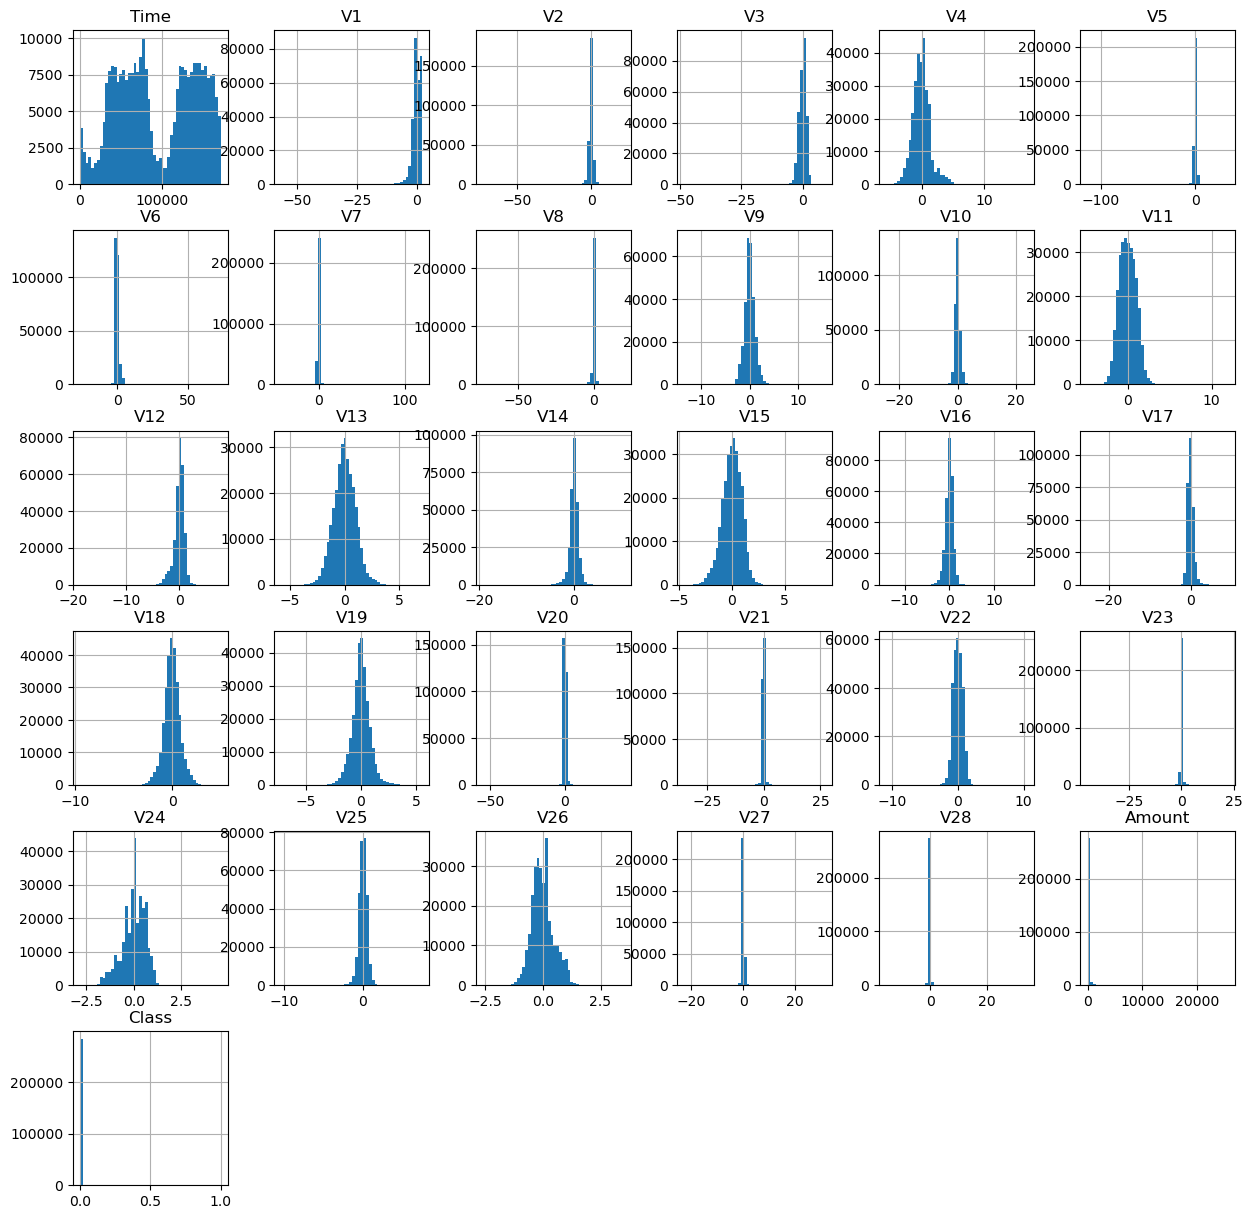

In [9]:
df.hist(bins=50, figsize=(15,15))

In [10]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [11]:
df[df['Class']==1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [12]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

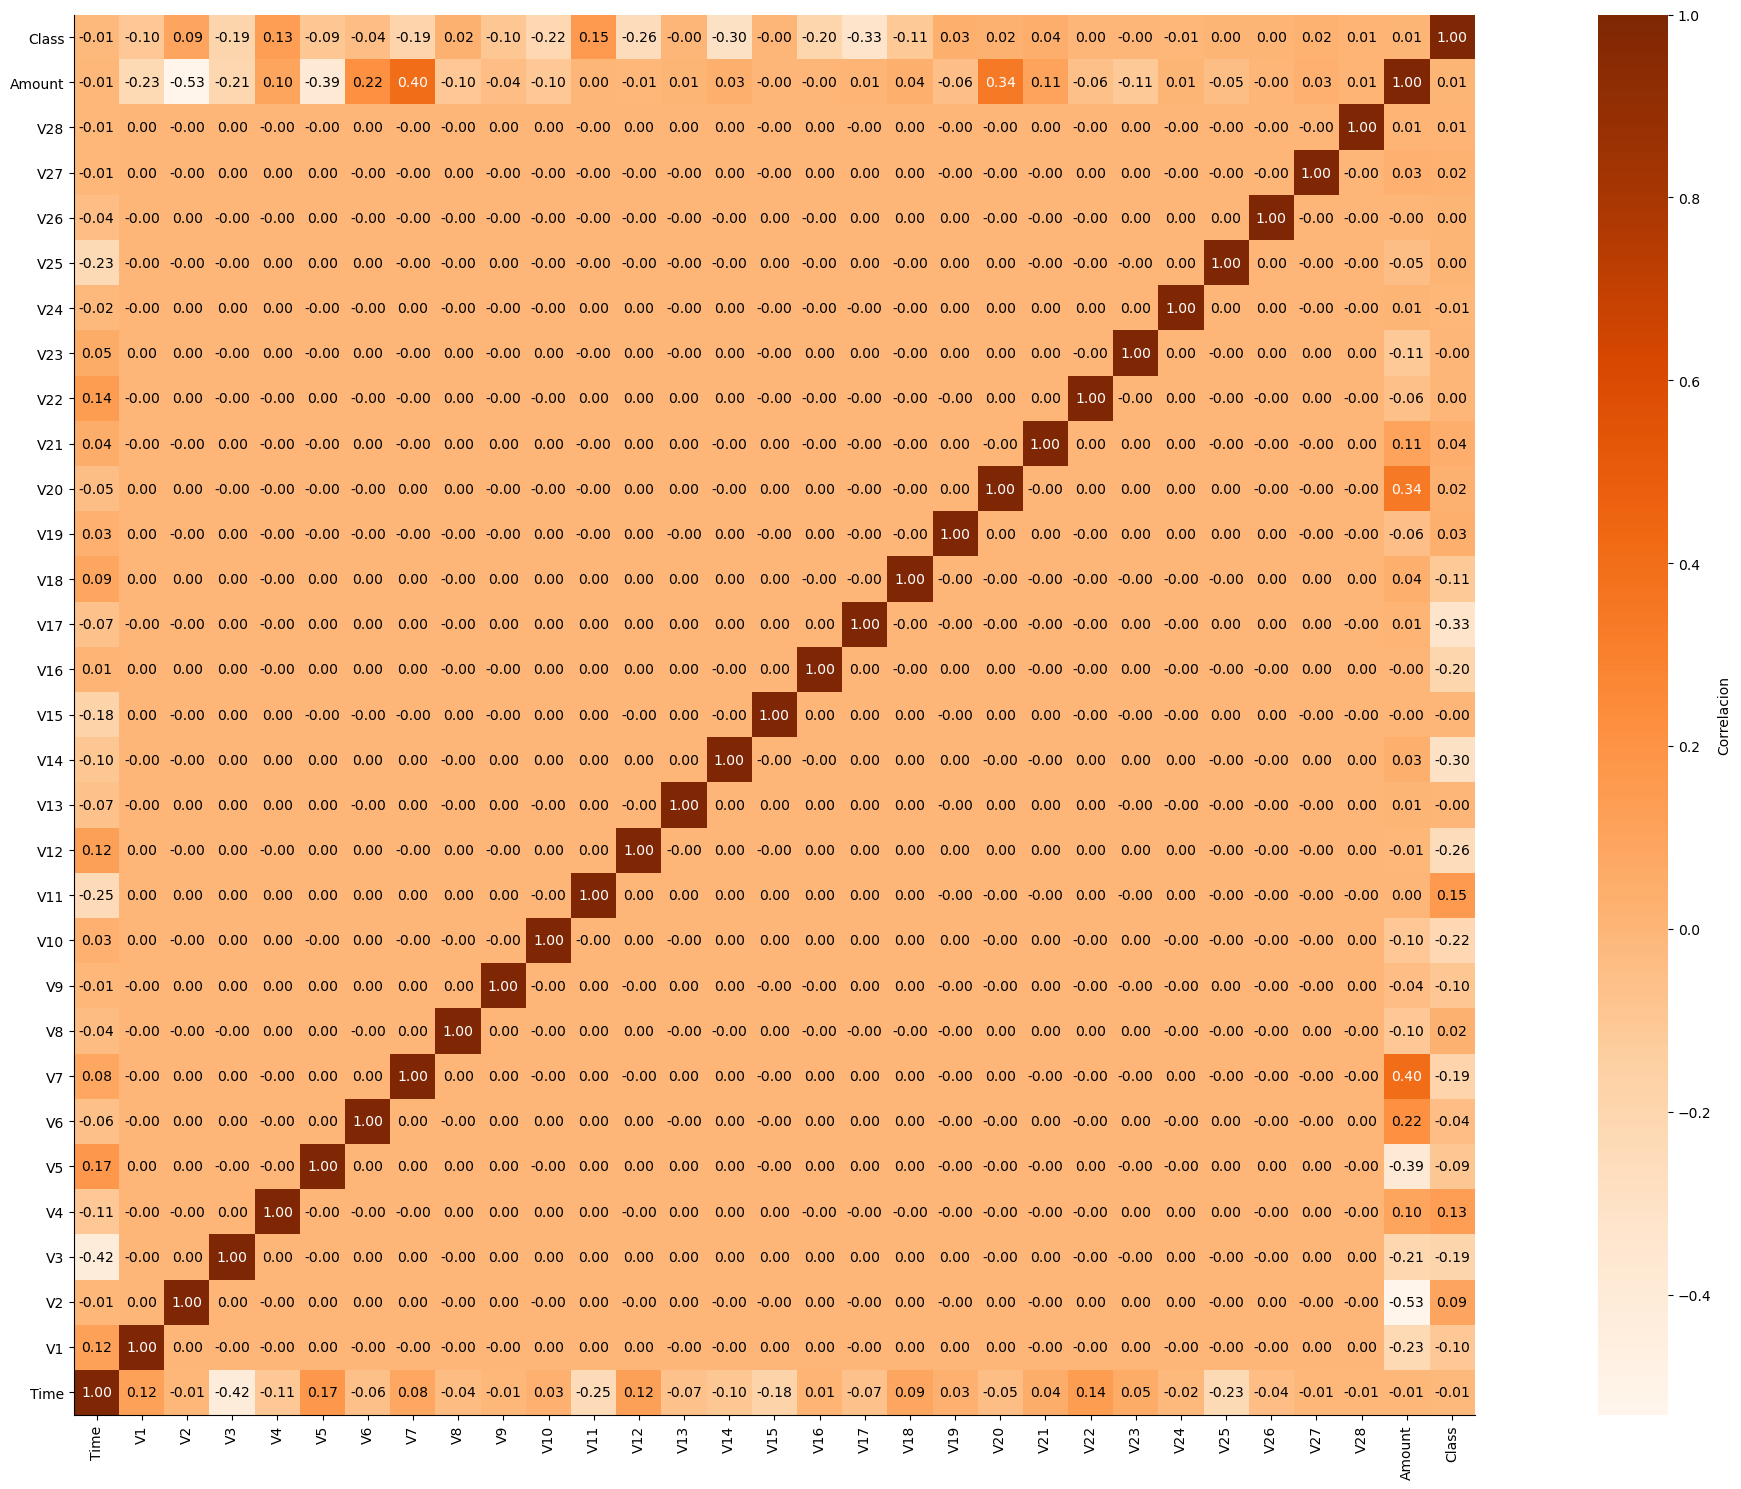

In [13]:
corr_matrix= df.corr()
mapa_calor(corr_matrix)

In [15]:
df=df[corr_matrix[(corr_matrix['Class']>=0.1) | (corr_matrix['Class']<=-0.1)].index]

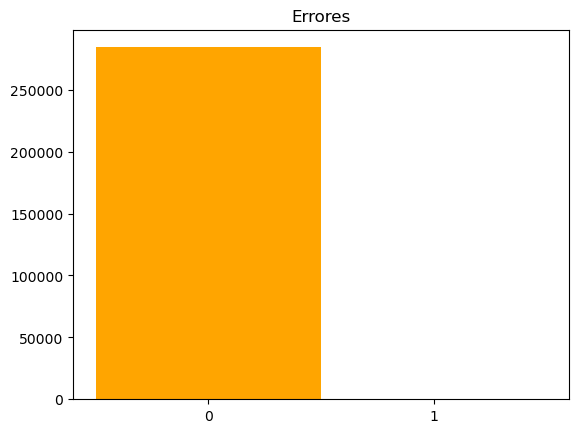

In [16]:

plt.hist(df['Class'], bins=[-0.5, 0.5, 1.5],color='orange') 
plt.xticks([0, 1]) 
plt.title('Errores')
plt.show()

In [17]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression


(427210,142404)
----------------------------
Modelo: DecisionTreeClassifier
Precisión: 0.7576601671309192
Recall: 0.7371273712737128
ROC_AUC_SCORE:0.8751488229817863
[[213149     87]
 [    97    272]]
----------------------------
Modelo: XGBClassifier
Precisión: 0.935064935064935
Recall: 0.7804878048780488
ROC_AUC_SCORE:0.9747044205280447
[[213216     20]
 [    81    288]]
----------------------------
Modelo: GaussianNB
Precisión: 0.12291585886002326
Recall: 0.8590785907859079
ROC_AUC_SCORE:0.9681021069013144
[[210974   2262]
 [    52    317]]
----------------------------
Modelo: MLPClassifier
Precisión: 0.9041095890410958
Recall: 0.7154471544715447
ROC_AUC_SCORE:0.9787890521798539
[[213208     28]
 [   105    264]]


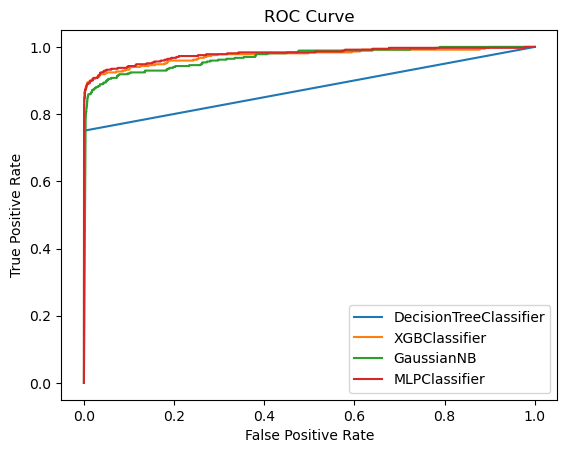

In [18]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import warnings

from sklearn.svm import SVC
warnings.filterwarnings("ignore")

x_train, y_train, x_test, y_test = train(df)

listaClasificadores=[
                    # [SGDClassifier(),'SGDClassifier'],
                    [DecisionTreeClassifier(),'DecisionTreeClassifier'],
                    #  [RandomForestClassifier(),'RandomForestClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    #  [SVC(probability=True),'SVC'],
                    [XGBClassifier(),'XGBClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    [GaussianNB(),'GaussianNB'],
                    [MLPClassifier(),'MLPClassifier']
                    ]

for clf, nombre in listaClasificadores:
    print('----------------------------')
    print(f'Modelo: {nombre}')
    ret = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")
    y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
    print(f'Precisión: {precision_score(y_train, y_train_pred)}')
    print(f'Recall: {recall_score(y_train, y_train_pred)}')
    

    y_probas = cross_val_predict(clf, x_train, y_train, cv=3, method="predict_proba")   
    y_scores = y_probas[:, 1]

    
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    print(f'ROC_AUC_SCORE:{roc_auc_score(y_train, y_scores)}')
    plt.plot(fpr, tpr, label=nombre)
    mc = confusion_matrix(y_train, y_train_pred)
    print(f'{mc}')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()


In [19]:
df_fraude= df[df['Class']==1]


In [20]:
df_nofraude= df[df['Class']==0]
df_nofraude = df_nofraude.sample(n=df_fraude.shape[0])
#df_nofraude=df_nofraude[:df_fraude.shape[0]]
df_nofraude


,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
112108,-3.206885,-1.958129,-2.635573,-1.461909,0.286198,-0.721080,0.463294,0.937697,1.284187,-0.550528,0.157109,0
219311,0.352432,-4.055083,-0.265967,1.728572,0.489438,-1.598100,-1.581549,0.862860,0.495853,0.360847,-1.121910,0
275021,-3.163785,-5.903713,0.517577,3.708232,0.589535,0.340919,-0.644919,1.216206,-0.708294,0.518727,0.893452,0
66046,-0.410805,1.332435,-1.292345,0.599818,0.216880,1.368110,0.097948,-0.207264,1.145276,-0.029421,-0.597764,0
119990,1.260020,0.283073,-1.490911,-0.373937,-0.206226,0.183525,0.610647,0.251529,-2.397108,0.407416,0.740565,0
...,...,...,...,...,...,...,...,...,...,...,...,...
54881,0.974282,0.266728,-0.663820,-0.569171,0.721189,0.983652,-0.577793,0.211452,1.636736,-0.118649,-0.542723,0
282666,2.066258,-1.090893,0.402288,0.182783,0.073677,-0.798353,0.411477,0.274329,-0.086623,-0.309702,-0.847941,0
139267,-0.933927,1.995246,-0.775301,0.260727,-0.790009,-0.492914,-0.902655,0.400328,0.627667,-0.412697,-0.283630,0
239839,-4.478431,-0.396792,-2.814355,-1.219295,1.729945,-0.255656,-0.828597,0.105725,0.513884,0.269394,0.797209,0


In [21]:
df_medio=pd.concat([df_fraude, df_nofraude], axis=0)
df_medio = df_medio.sample(frac=1).reset_index(drop=True)
df_medio

,V1,V3,V4,V7,V10,V11,V12,V14,V16,V17,V18,Class
0,0.051862,1.086097,0.515425,0.428111,-0.607979,-0.073211,-2.394973,1.419283,0.216967,0.170190,0.183183,0
1,2.078684,-1.300784,-0.388881,-0.201927,0.955260,-1.002597,-0.258470,0.287522,-1.397906,-0.242229,1.150523,0
2,-0.544419,2.252103,0.880623,0.723573,0.280850,0.757105,0.539792,-0.133416,-1.039887,0.556554,-0.933919,0
3,1.176633,-6.140445,5.521821,-0.932429,-3.898240,4.776720,-4.152499,-10.258851,0.458139,0.167602,1.404311,1
4,-1.952933,-1.310561,5.955664,-4.587235,-2.850324,2.024674,-6.487746,-2.241516,-3.936857,-6.127194,-2.328552,1
...,...,...,...,...,...,...,...,...,...,...,...,...
979,-5.187878,-13.510931,8.617895,-9.462533,-11.786812,9.369079,-15.094163,-11.852161,-10.688242,-18.388811,-6.898840,1
980,-0.960920,1.446351,0.624787,0.218330,-0.627688,1.009399,0.927397,0.444537,-0.381197,0.230633,-0.300884,0
981,1.833864,0.442603,3.745442,-0.880875,1.383491,-1.572578,-0.901225,-0.108972,1.638936,-1.058123,0.307912,0
982,-2.729482,-4.242710,5.036985,-3.449159,-5.653638,3.942316,-5.883724,-9.266120,-2.205644,-5.709087,-1.113937,1


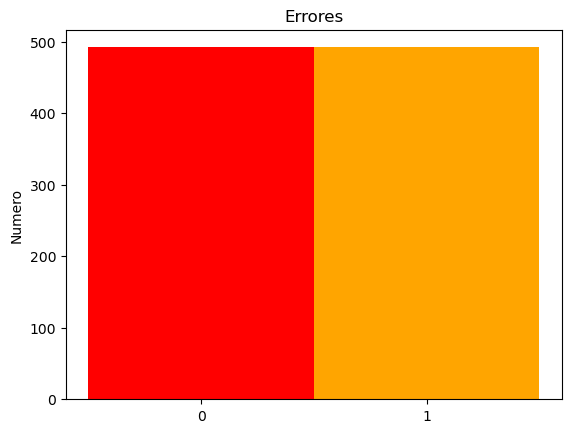

In [22]:
plt.hist(df_medio[df_medio['Class'] == 0]['Class'], bins=[-0.5, 0.5, 1.5], color='red')
plt.hist(df_medio[df_medio['Class'] == 1]['Class'], bins=[-0.5, 0.5, 1.5], color='orange')
plt.xticks([0, 1])
plt.title('Errores')
plt.ylabel('Numero')
plt.show()

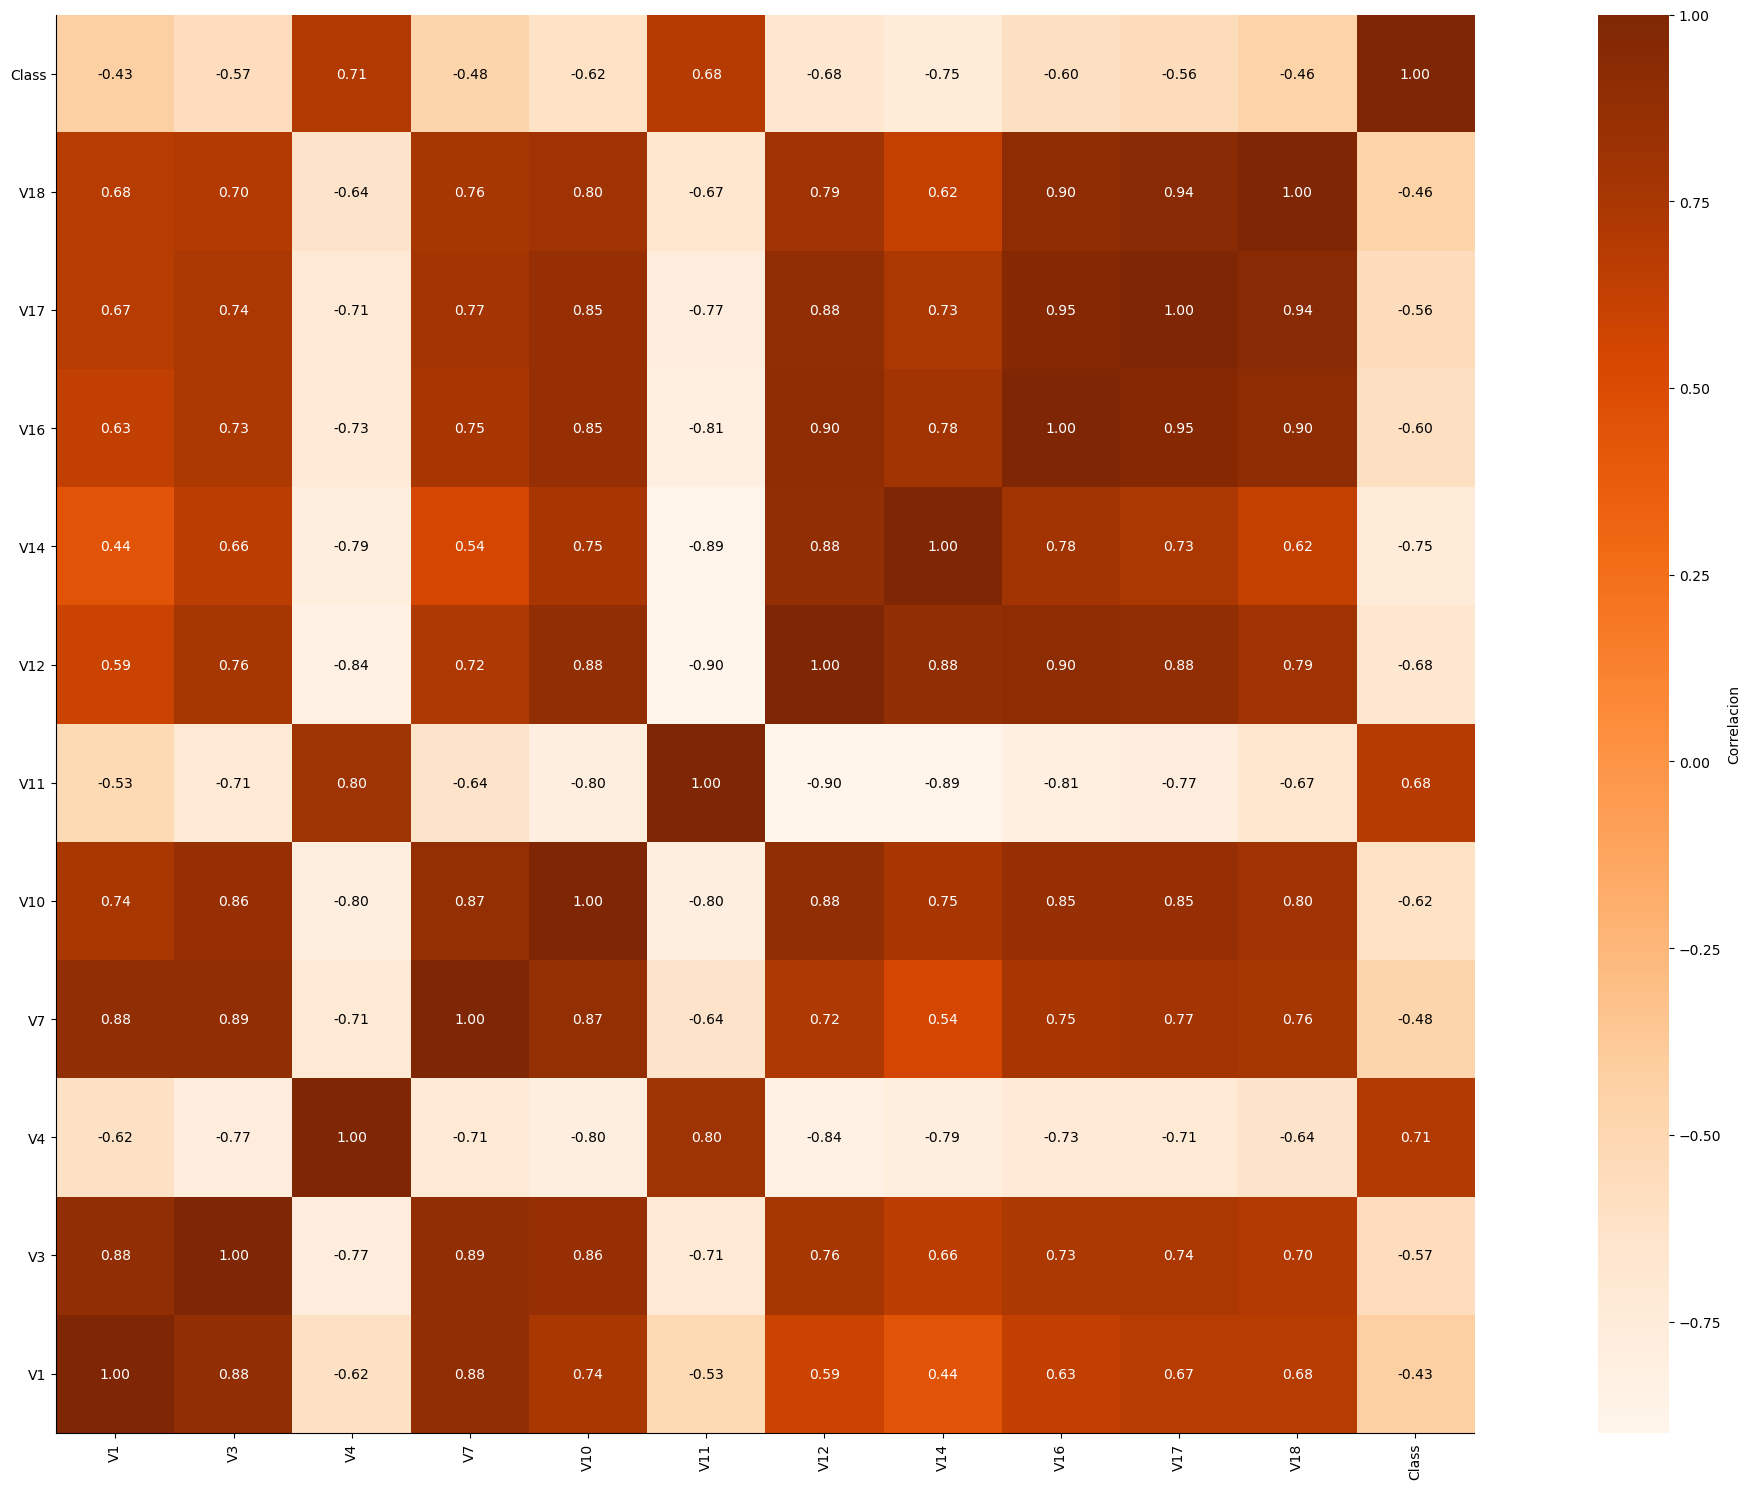

In [23]:
corr_matrix= df_medio.corr()
mapa_calor(corr_matrix)

# Datos de entrenamiento

(1476,492)
----------------------------
Modelo: DecisionTreeClassifier
Precisión: 0.9132791327913279
Recall: 0.9132791327913279
ROC_AUC_SCORE:0.9105691056910569
[[337  32]
 [ 32 337]]
----------------------------
Modelo: XGBClassifier
Precisión: 0.9578651685393258
Recall: 0.924119241192412
ROC_AUC_SCORE:0.9826088233782067
[[354  15]
 [ 28 341]]
----------------------------
Modelo: GaussianNB
Precisión: 0.9702380952380952
Recall: 0.8834688346883469
ROC_AUC_SCORE:0.9713243880406284
[[359  10]
 [ 43 326]]
----------------------------
Modelo: MLPClassifier
Precisión: 0.9714285714285714
Recall: 0.9214092140921409
ROC_AUC_SCORE:0.9797519113402515
[[359  10]
 [ 29 340]]


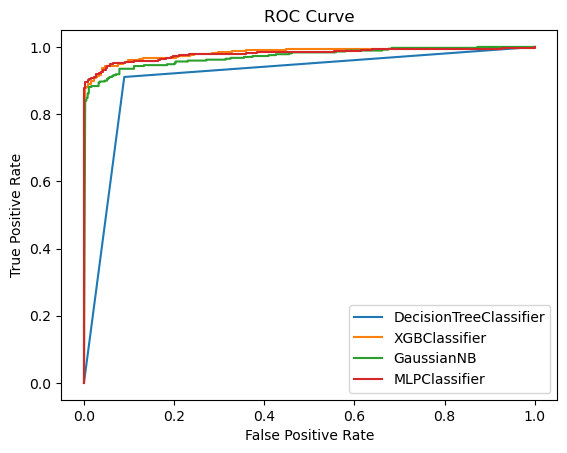

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC
warnings.filterwarnings("ignore")

x_train, y_train, x_test, y_test = train(df_medio)

listaClasificadores=[
                    # [SGDClassifier(),'SGDClassifier'],
                    [DecisionTreeClassifier(),'DecisionTreeClassifier'],
                    #  [RandomForestClassifier(),'RandomForestClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    #  [SVC(probability=True),'SVC'],
                    [XGBClassifier(),'XGBClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    [GaussianNB(),'GaussianNB'],
                    [MLPClassifier(),'MLPClassifier']
                    ]

for clf, nombre in listaClasificadores:
    clf.fit(x_test,y_test)
    
    print('----------------------------')
    print(f'Modelo: {nombre}')
    ret = cross_val_score(clf, x_train, y_train, cv=3, scoring="accuracy")
    y_train_pred = cross_val_predict(clf, x_train, y_train, cv=3)
    print(f'Precisión: {precision_score(y_train, y_train_pred)}')
    print(f'Recall: {recall_score(y_train, y_train_pred)}')

    y_probas = cross_val_predict(clf, x_train, y_train, cv=3, method="predict_proba")   
    y_scores = y_probas[:, 1]

    
    fpr, tpr, thresholds = roc_curve(y_train, y_scores)
    print(f'ROC_AUC_SCORE:{roc_auc_score(y_train, y_scores)}')
    plt.plot(fpr, tpr, label=nombre)
    mc = confusion_matrix(y_train, y_train_pred)
    print(f'{mc}')
plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

# Datos de test

(1476,492)
----------------------------
Modelo: DecisionTreeClassifier
Precisión: 0.8861788617886179
Recall: 0.8861788617886179
ROC_AUC_SCORE: 0.8861788617886179
[[109  14]
 [ 14 109]]
----------------------------
Modelo: XGBClassifier
Precisión: 0.9344262295081968
Recall: 0.926829268292683
ROC_AUC_SCORE: 0.9718421574459647
[[115   8]
 [  9 114]]
----------------------------
Modelo: GaussianNB
Precisión: 0.9646017699115044
Recall: 0.8861788617886179
ROC_AUC_SCORE: 0.9583250710555886
[[119   4]
 [ 14 109]]
----------------------------
Modelo: MLPClassifier
Precisión: 0.9112903225806451
Recall: 0.9186991869918699
ROC_AUC_SCORE: 0.9714455681142177
[[112  11]
 [ 10 113]]


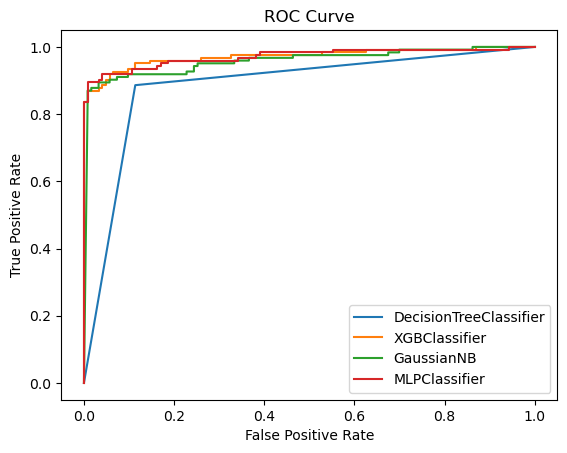

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score, cross_val_predict
import matplotlib.pyplot as plt
import warnings
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

x_train, y_train, x_test, y_test = train(df_medio)

listaClasificadores=[
                    # [SGDClassifier(),'SGDClassifier'],
                    [DecisionTreeClassifier(),'DecisionTreeClassifier'],
                    #  [RandomForestClassifier(),'RandomForestClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    #  [SVC(probability=True),'SVC'],
                    [XGBClassifier(),'XGBClassifier'],
                    #  [AdaBoostClassifier(),'AdaBoostClassifier'],
                    [GaussianNB(),'GaussianNB'],
                    [MLPClassifier(),'MLPClassifier']
                    ]

for clf, nombre in listaClasificadores:
    clf.fit(x_train, y_train)
    
    print('----------------------------')
    print(f'Modelo: {nombre}')
    
    # Calcular métricas con datos de prueba
    y_test_pred = clf.predict(x_test)
    print(f'Precisión: {precision_score(y_test, y_test_pred)}')
    print(f'Recall: {recall_score(y_test, y_test_pred)}')
    
    # Calcular probabilidades y puntajes de la curva ROC con datos de prueba
    y_probas = clf.predict_proba(x_test)   
    y_scores = y_probas[:, 1]
    print(f'ROC_AUC_SCORE: {roc_auc_score(y_test, y_scores)}')
    
    # Graficar la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=nombre)
    
    # Mostrar matriz de confusión
    mc = confusion_matrix(y_test, y_test_pred)
    print(f'{mc}')

plt.legend()
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
